# 데이터 전처리 및 활용

In [ ]:
# diabetes.csv 를 y: outcome,  X:나머지
import pandas as pd
df = pd.read_csv("diabetes.csv")
#credit.drop("default10yr", axis=1, inplace=True)# default10yr라는 변수 삭제
#credit.isnull().mean()# 결측치 확인

#partitioning: y변수, X변수들
from sklearn.model_selection import train_test_split
y_train, y_test, X_train, X_test = train_test_split( df.Outcome,
                               df.drop("Outcome", axis=1),
                                                     test_size=0.3)
#scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler() #MinMaxScaler()
scaler.fit( X_train )
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )
X_train_scaled = pd.DataFrame( X_train_scaled, columns=X_train.columns )
X_test_scaled = pd.DataFrame( X_test_scaled, columns=X_test.columns )

In [ ]:
#one hot encoding
import numpy as np
ohe = pd.get_dummies(df.Outcome)  #, drop_first=True)
np.argmax( ohe.values, axis=1 )  #각행의 최대값이 갖는 컬럼이름 출력

In [ ]:
#weatherAUS.csv 를 df로 읽으세요
df = pd.read_csv('weatherAUS.csv')
#결측치를 처리해보세요 -> df.dropna(inplace=True)
df.dropna(inplace=True)  #df.isnull().mean()
#X변수들 중에서 수치형, 범주형 분리 X_cat, X_num
X_cat = df.select_dtypes(include='object')
X_num = df.select_dtypes(include='number')
#y는 RainTomorrow
y = df.RainTomorrow
#수치형 X변수만 사용하셔서 y_train, y_test, X_train, X_test를 생성(파티셔닝)
from sklearn.model_selection import train_test_split
y_train, y_test, X_train, X_test = train_test_split( y, X_num, test_size=0.3)
#MinMaxScaling (train으로 fit)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit( X_train )
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )
#y변수는 One Hot Encoding
pd.get_dummies(y_train)
df.replace(["Yes","No"], ["Yes_rain","No_rain"], inplace=True)
def func1(x):
    if x == "Yes_rain":
        return 1
    else:
        return 0
df["RainTomorrow"].apply(func1)
df.RainTomorrow.value_counts()/ df.shape[0]

,count
RainTomorrow,
No_rain,0.772586
Yes_rain,0.227414


#1. Imputing
- Source: credit approval dataset(crx data): http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/


In [ ]:
#Complete case analysis: missing value가 하나라도 있는 행은 제거 / Missing이 적은 경우에 사용
import pandas as pd
data = pd.read_csv('creditApprovalUCI.csv')
data.shape
data.isnull().mean().sort_values(ascending=True)
#data의 컬럼별로 missing을 체크해서, 컬럼별로 평균 / True, False / 각 컬럼별로 missing value의 비율, 정렬도 시킴
data_cca = data.dropna()#how='any', 하나라도 missing이 있는 행 제거
data_cca.isnull().mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A1     0.0
A2     0.0
A3     0.0
A4     0.0
A5     0.0
A6     0.0
A7     0.0
A8     0.0
A9     0.0
A10    0.0
A11    0.0
A12    0.0
A13    0.0
A14    0.0
A15    0.0
A16    0.0
dtype: float64

In [ ]:
print(data.shape)
print(data_cca.shape)

(690, 16)
(690, 16)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#또는 특정 변수에 대해서도 사용할 수 있음!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
data.dropna(subset=['A3', 'A4'])  #좋은방법!

#모든 변수에서 missing이어야 해당 행 제거
data.dropna(how='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


- Mean or Median Imputation

In [3]:
#weatherAUS.csv 를 읽으세요
import pandas as pd
weather = pd.read_csv('weatherAUS.csv')
#print( weather.isnull().mean())

#select_dtypes를 이용하셔서 numeric 컬럼을 선택해주세요
weather_num = weather.select_dtypes(include='number')
#print(weather_num.columns)

#imputing, 평균값으로
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit( weather_num )
imputed = imputer.transform( weather_num )
pd.DataFrame( imputed, columns=weather_num.columns)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,5.1,14.3,0.0,1.800000,8.900000,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.000000,1.000000,9.1,13.3,0.0
1,1.1,14.5,0.4,5.189544,7.544688,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,4.331488,4.462321,1.3,13.7,0.0
2,19.7,26.2,0.0,7.200000,7.200000,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.000000,4.000000,22.7,24.4,0.2
3,16.6,28.0,0.0,9.000000,11.300000,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.000000,1.000000,20.0,26.1,0.0
4,14.6,25.3,0.0,5.189544,7.544688,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,4.331488,4.462321,22.2,22.6,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36876,10.1,14.2,7.4,3.400000,0.000000,46.0,19.0,15.0,84.0,81.0,1016.2,1014.5,7.000000,8.000000,10.4,13.9,9.0
36877,6.3,26.0,0.0,5.000000,10.600000,37.0,9.0,26.0,38.0,45.0,1024.2,1021.5,1.000000,1.000000,18.4,23.5,0.0
36878,20.5,31.7,0.0,7.000000,11.100000,37.0,20.0,13.0,54.0,39.0,1012.6,1009.0,2.000000,5.000000,25.7,30.5,0.0
36879,6.3,23.3,0.0,5.200000,11.600000,39.0,9.0,20.0,50.0,41.0,1023.9,1019.9,0.000000,1.000000,16.4,20.9,0.0


In [ ]:
#missing을 평균이나 중앙값 대체(numerical 변수에 적용),
#주로 train에서의 평균/중앙값을 계산 후 test나 이후의 경우에 사용
#정규분포인 경우에만 적용, 그 외에는 데이터를 왜곡
import pandas as pd
from sklearn.impute import SimpleImputer

data = pd.read_csv('creditApprovalUCI.csv')
print(data.isnull().mean())

- creditApprovalUCI.csv 파일을 읽으셔서, 1~100행의 2번 및 3번 컬럼만 사용하셔서
- mean으로 imputing 해보세요.


In [ ]:
#sklearn으로 imputing-이 방법을 사용!
data = pd.read_csv('creditApprovalUCI.csv')

data_num = data.iloc[ 0:100, 1:3 ]
data_num

In [ ]:
#수치형 변수로만 구성된 데이터프레임 만들기
#data_num = data[['A2', 'A3', 'A8', 'A11', 'A15']]
print(data_num.isnull().mean())

#데이터프레임의 컬럼 선택하는 방법
# 데이터프레임['컬럼이름']
# 데이터프레임[ ['컬럼이름1', '컬럼이름2', '컬럼이름3' ]]

imputer = SimpleImputer(strategy='mean')  #또는 mean
imputer.fit(data_num) #median값을 찾아주기만 함
print(imputer.statistics_)
data_num = imputer.transform(data_num)  #np.array가 결과이므로 필요 시 다시 dataframe 변환
data_num_df = pd.DataFrame(data_num)
print(data_num_df.isnull().mean())

A2    0.0
A3    0.0
dtype: float64
[32.8228  5.5336]
0    0.0
1    0.0
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#imputing mode or frequent category
import pandas as pd
from sklearn.impute import SimpleImputer

data = pd.read_csv('creditApprovalUCI.csv')

data_cat = data[['A4', 'A5', 'A6', 'A7']]
print(data_cat.isnull().mean())

A4    0.0
A5    0.0
A6    0.0
A7    0.0
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
#가장 빈번하게 발생하는 범주로 missing을 대체
#imputer.fit(data_cat)
#imputer.statistics_
#data_cat = imputer.transform(data_cat)

#아래처럼 한 번에 수행해도 됨
data_cat = imputer.fit_transform(data_cat)

data_cat_df = pd.DataFrame( data_cat )
print(data_cat_df.isnull().mean())

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!ls -al
!pwd
!pip


#2. Partitioning

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
train, test = train_test_split(data, test_size=0.3)

#컬럼 삭제: .drop 메소드, axis=1로 지정, labels에 컬럼 이름 지정
data.drop(labels=['A16'], axis=1) #단, 원본 데이터프레임인 data에는 반영안되고, A16컬럼이 제거된 새로운 데이터프레임이 출력됨.
print(data['A16'])

#data.drop(labels=['A16'], axis=1, inplace=True) #inplace=True를 지정하면 원본 데이터프레임인 data에 반영됨
#print(data['A16'])

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: A16, Length: 690, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X = data.drop(labels=['A16'], axis=1)#data에서 A16변수만 지우고...
y = data['A16']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#3. Imputing+Partitionig+Scaling

In [ ]:
#standard scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('creditApprovalUCI.csv')
data_num = data[['A2', 'A3', 'A8', 'A11', 'A15']] #수치형 변수로 구성된 data_num
columns_name = data_num.columns

imputer = SimpleImputer(strategy='median')
data_num = imputer.fit_transform(data_num)
data_num.shape
data_num_df = pd.DataFrame(data_num, columns = columns_name)
data_num_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,A2,A3,A8,A11,A15
0,30.83,0.000,1.25,1.0,0.0
1,58.67,4.460,3.04,6.0,560.0
2,24.50,0.500,1.50,0.0,824.0
3,27.83,1.540,3.75,5.0,3.0
4,20.17,5.625,1.71,0.0,0.0
...,...,...,...,...,...
685,21.08,10.085,1.25,0.0,0.0
686,22.67,0.750,2.00,2.0,394.0
687,25.25,13.500,2.00,1.0,1.0
688,17.92,0.205,0.04,0.0,750.0


In [ ]:
X_train, X_test = train_test_split( data_num_df, test_size=0.3)
print(X_train.shape, X_test.shape)

(483, 5) (207, 5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scaler = StandardScaler()

#X_train만 스케일링할 경우
X_train_scaled = scaler.fit_transform(X_train)

#X_train의 평균, 표준편차로 다른 데이터프레임도 스케일링 할 경우
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #다만, 변환 후에는 numpy array
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#minmax scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



#4. apply 함수 활용 missing value 처리

In [ ]:
import numpy as np
import pandas as pd

def get_first_cabin(row):
	try:
		return row.split()[0]
	except:
		return np.nan

data = pd.read_csv("titanic_raw.csv")
data = data.replace('?', np.nan)
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.to_csv('titanic.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


titanic.csv read-> column->missing percentage

numeric variable->
mean imputing
train, test split(test=0.3)
minmax scaling



In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("titanic.csv")
df_num = df[ ['age', 'sibsp']]
df_num.isnull().mean()
imputer = SimpleImputer(strategy='mean')
df_num = pd.DataFrame( imputer.fit_transform(df_num), columns = [['age', 'sibsp']] )
train, test = train_test_split( df_num, test_size=0.3)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform( train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- 탐색

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

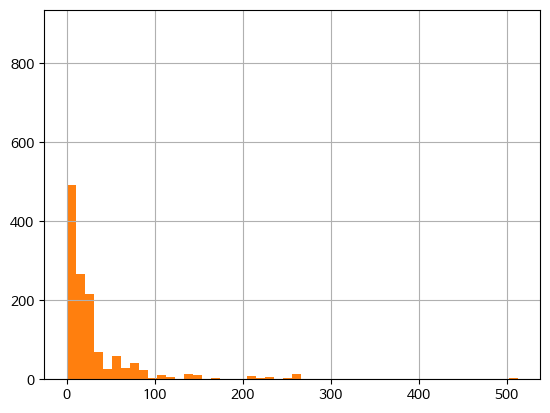

In [ ]:
#탐색적 자료 분석
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data.columns
data.dtypes
data['sibsp'].unique()
data['fare'].unique()[0:20]

#embarked, cabin에 대해서도 확인해보기
data['embarked'].unique()
#data.describe()
#Histogram
data['sibsp'].hist(bins=20)
data['fare'].hist(bins=50)

- 다른 데이터로 확인!
 - 데이터 다운로드 및 압축 해제

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup98-mld/epsilon_mirror/cup98lrn.zip
!unzip cup98lrn.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2023-11-16 13:47:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup98-mld/epsilon_mirror/cup98lrn.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘cup98lrn.zip.1’

cup98lrn.zip.1          [  <=>               ]  34.78M  88.6MB/s    in 0.4s    

2023-11-16 13:47:33 (88.6 MB/s) - ‘cup98lrn.zip.1’ saved [36468735]

Archive:  cup98lrn.zip
replace cup98LRN.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cup98LRN.txt            


In [ ]:
#missing data 확인
import pandas as pd
import matplotlib.pyplot as plt
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT',
'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']
data = pd.read_csv('cup98LRN.txt', usecols=cols)
data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [ ]:
data.describe()
#data.isnull().sum()	#변수별 missing value의 수
data.isnull().mean() 	#변수별 missing value 비율


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Quantifying missing data')

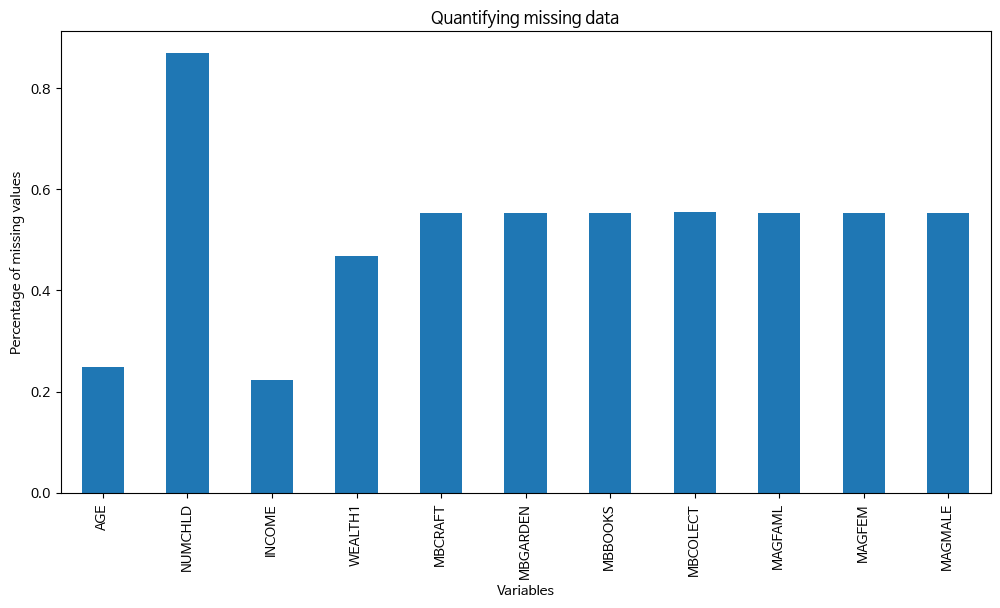

In [ ]:
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')


In [ ]:
#범주형 변수의 cardinality(범주의 수)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
data = pd.read_csv('cup98LRN.txt', usecols=cols)
data = data.replace(' ', np.nan)		#비어있는 문자열을 NaN으로 치환
data.head()
data.nunique()
data['GENDER'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Cardinality')

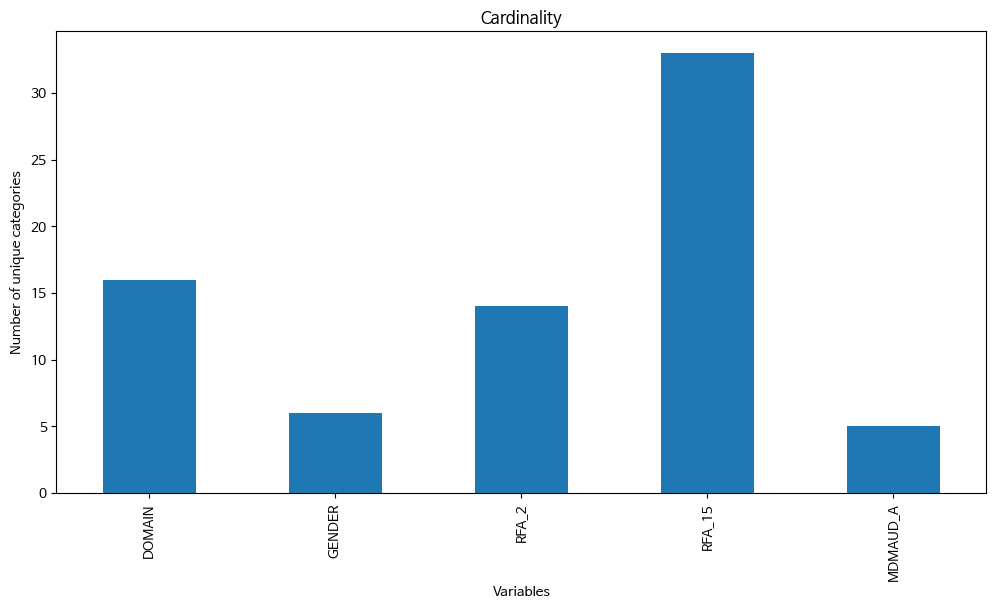

In [ ]:
data.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [ ]:
#numerical 변수의 distinct value의 개수
data[['RFA_2', 'MDMAUD_A', 'GENDER']].nunique()

#GENDER 변수의 범주별 빈도를 측정해보세요~
data['GENDER'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [ ]:
#소수의 범주 발견
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('car.data', header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()
data['class'].unique()
label_freq = data['class'].value_counts() / len(data)
print(label_freq)


unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


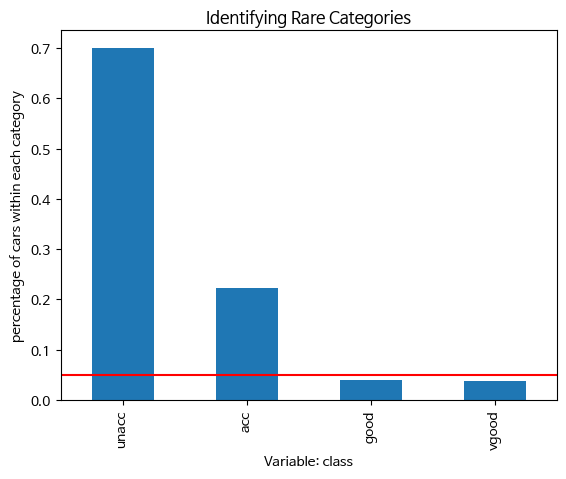

In [ ]:
data['class'].unique()
label_freq = data['class'].value_counts() / len(data)
print(label_freq)

fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

- Variable distribution 확인하기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


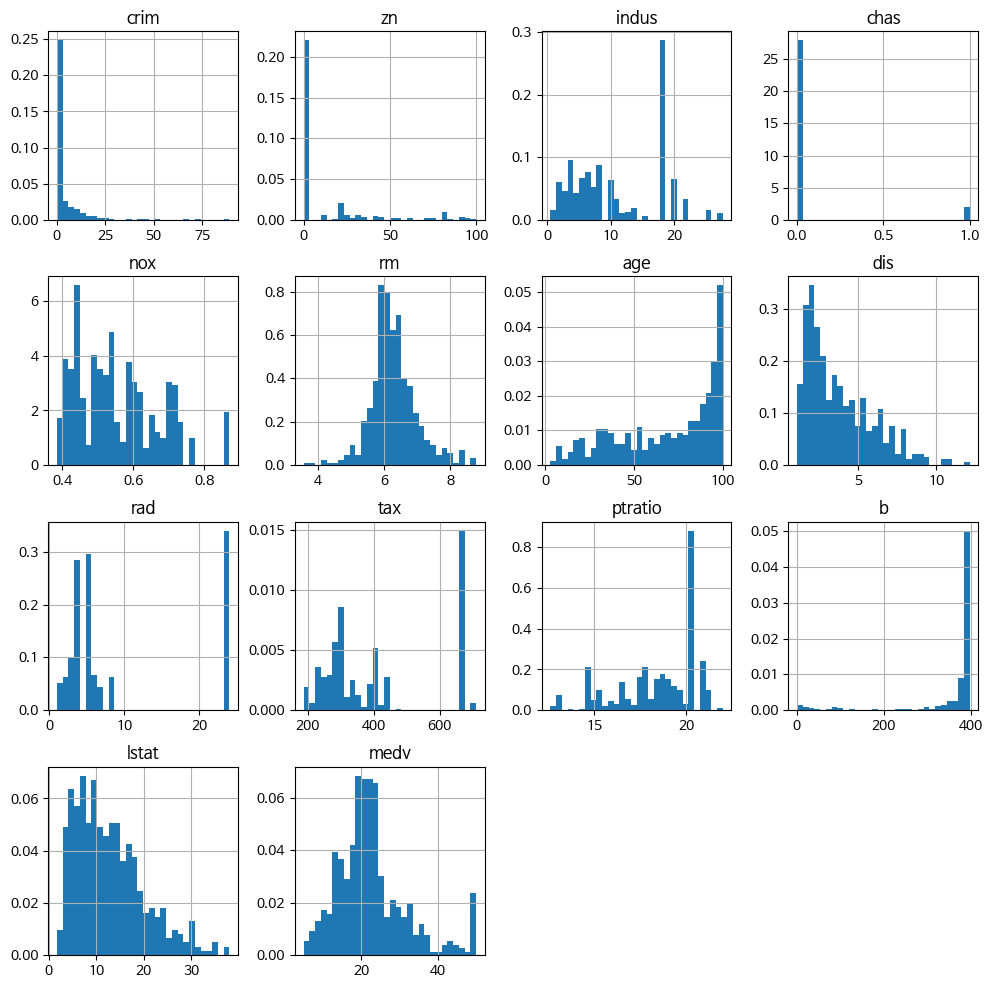

In [ ]:
boston = pd.read_csv("BostonHousing.csv")
#boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

In [ ]:
boston.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Boxplot')

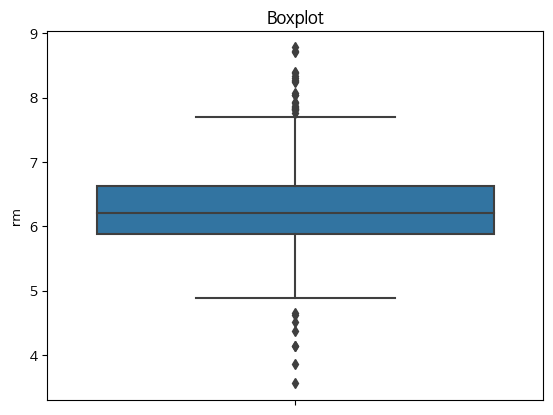

In [ ]:
#Box plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

boston1 = boston[['rm', 'lstat', 'crim']]

sns.boxplot(y=boston1['rm'])
plt.title('Boxplot')


In [ ]:
#adv.csv를 읽어주세요
adv = pd.read_csv("adv.csv", index_col=0)
adv.head()
import seaborn as sns
#sns.boxplot( adv.sales)
#sns.pairplot( adv )
#sns.heatmap( adv.corr() )

#creditset2.csv 읽으세요,
#default10yr를 삭제, 나머지 3개 변수에 대해서 pairplot, corr에 대한 heatmap
credit = pd.read_csv("creditset2.csv")
#credit.drop("default10yr", axis=1, inplace=True)
credit = credit.query( "default10yr==1")
#sns.pairplot( credit )
#sns.heatmap( credit.corr() )
#default10yr가 1인 행들에 대해서 pairplot, corr에 대한 heatmap
#query
credit.describe().T
credit.default10yr.value_counts()

#공간 데이터: geopandas, geodataframe

In [ ]:
#outlier 제거하기
#boxplot의 IQR(Q3-Q1)의 1.5배를 넘는 값들을 제거
def find_boundaries(df, variable, distance):
	IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
	lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
	upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
	return upper_boundary, lower_boundary

upper_boundary, lower_boundary = find_boundaries(boston, 'rm', 1.5)
upper_boundary, lower_boundary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7.730500000000001, 4.778499999999999)

In [ ]:
outliers = np.where(boston['rm'] > upper_boundary, True,
np.where(boston['rm'] < lower_boundary, True, False))
~outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
outliers_df = boston.loc[outliers, 'rm']
outliers_df.head()

#outlier 실제로 제거해보기
boston.loc[~outliers, 'rm']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 476, dtype: float64

#4. Category Encoding

In [ ]:
!pip install feature-engine
!pip install category_encoders

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 - Credit 데이터로 연습을 위한 데이터 읽고 생성하기

In [ ]:
import random
import pandas as pd
import numpy as np

data = pd.read_csv('crx.data', header=None)
varnames = ['A'+str(s) for s in range(1,17)]
data.columns = varnames
data = data.replace('?', np.nan)

#re-cast to float
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

#recode target as binary
data['A16'] = data['A16'].map({'+':1, '-':0})

cat_cols = [c for c in data.columns if data[c].dtypes=='O']	#범주형 변수
num_cols = [c for c in data.columns if data[c].dtypes!='O']	#수치형 변수

#missing 처리
data[num_cols] = data[num_cols].fillna(0)
data[cat_cols] = data[cat_cols].fillna('Missing')

data.to_csv('creditApprovalUCI.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- One Hot Encoding
 - onehot encoding
 - 예: 성별->각 범주가 컬럼이 되고, 값은 1또는 0 또는 한 변수에서 값이 1과 0
 - 범주 수(k)-1개의 변수로 표현
 - 경우에 따라 범주 개수 만큼의 변수로 인코딩할 수 있음:
 - DT와 같이 재귀적이고 분할하여 모델링하는 경우, 각 범주가 분리되는 것이 효과적

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'], test_size=0.3,random_state=0)
X_train['A4'].unique()
X_train['A4'].isnull().mean()
X_train['A4'].value_counts()
pd.get_dummies( X_train['A4'], drop_first=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,l,u,y
596,0,1,0
303,0,1,0
204,0,0,1
351,0,0,1
118,0,1,0
...,...,...,...
359,0,1,0
192,0,1,0
629,0,1,0
559,0,1,0


In [ ]:
pd.get_dummies(X_train['A4'], drop_first=True)
tmp = pd.get_dummies(X_train['A4'], drop_first=True)	#k-1개로 인코딩
tmp.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,l,u,y
596,0,1,0
303,0,1,0
204,0,0,1
351,0,0,1
118,0,1,0


In [ ]:
pd.get_dummies(X_train['A4'], drop_first=True, dummy_na=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,l,u,y,NaN
596,0,1,0,0
303,0,1,0,0
204,0,0,1,0
351,0,0,1,0
118,0,1,0,0
...,...,...,...,...
359,0,1,0,0
192,0,1,0,0
629,0,1,0,0
559,0,1,0,0


In [ ]:
#원래는 na를 무시하나, 별도의 카테고리로 반환시킬 수 있음
tmp = pd.get_dummies(X_train['A4'], drop_first=True, dummy_na=True)

#k-1개의 인코딩이 아닌, k개 변수로 인코딩
tmp = pd.get_dummies(X_train['A4'], drop_first=False)	#k-1개로 인코딩
tmp.head()

#모든 범주형 변수 인코딩
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10','A12', 'A13']
X_train_enc = pd.get_dummies(X_train[vars_categorical], drop_first=True)
X_test_enc = pd.get_dummies(X_test[vars_categorical], drop_first=True)
X_train_enc.head()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
596,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,1,1,0,0
303,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
204,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
351,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
118,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0


In [ ]:
#sklearn으로 수행하기
encoder = OneHotEncoder(categories='auto', drop='first',sparse=False)
encoder.fit(X_train[vars_categorical])

#test셋의 같은 변수에 더 많은 범주가 있는 경우, 무시하거나 오류처리
encoder = OneHotEncoder(categories='auto', drop='first',sparse=False, handle_unknown='ignore')
#encoder = OneHotEncoder(categories='auto', drop='first',sparse=False, handle_unknown='error')

encoder.fit(X_train[vars_categorical])
X_train_enc = encoder.transform(X_train[vars_categorical])
X_test_enc = encoder.transform(X_test[vars_categorical])	#단 ignore의 경우, 변수 명이 유지되지 못하므로 주의

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#frequent 범주에 대한 one hot encoding
#범주의 수가 많은 경우, 많은 공간이 필요
#빈번한 범주에 대해서만 인코딩할 수 있음
#top categories만 다루며, 그 외의 범주는 하나의 범주로 취급
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), # predictors
data['A16'], # target
test_size=0.3, # percentage of observations in test set
random_state=0) # seed to ensure reproducibility

X_train['A6'].unique()
#빈번한 범주 상위 5개만 보기
X_train['A6'].value_counts().sort_values(ascending=False).head(14)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c          93
q          56
w          48
i          41
ff         38
k          38
aa         34
cc         30
m          26
x          24
e          21
d          21
j           8
Missing     4
Name: A6, dtype: int64

In [ ]:
top_5 = [cat for cat in X_train['A6'].value_counts().sort_values(ascending=False).head(5).index]
top_5
#상위 범주, 그외 범주를 인코딩
for category in top_5:
	X_train['A6' + '_' + category] = np.where(X_train['A6'] ==category, 1, 0)
	X_test['A6' + '_' + category] = np.where(X_test['A6'] ==category, 1, 0)

print(X_train[['A6'] + ['A6'+'_'+c for c in top_5]].head(10))


     A6  A6_c  A6_q  A6_w  A6_i  A6_ff
596   c     1     0     0     0      0
303   q     0     1     0     0      0
204   w     0     0     1     0      0
351  ff     0     0     0     0      1
118   m     0     0     0     0      0
247   q     0     1     0     0      0
652   i     0     0     0     1      0
513   e     0     0     0     0      0
230  cc     0     0     0     0      0
250   e     0     0     0     0      0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#범주를 순서로 치환
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3,random_state=0)

#A7을 실습해보기
ordinal_mapping = {k: i for i, k in enumerate(X_train['A7'].unique(), 0) }
ordinal_mapping
#범주가 순서로 변경
X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)
X_train['A7']

#sklearn
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10','A12', 'A13']

le = OrdinalEncoder()
le.fit(X_train[vars_categorical])

X_train_enc = le.transform(X_train[vars_categorical])
X_test_enc = le.transform(X_test[vars_categorical])
X_train_enc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1., 2., 1., ..., 1., 1., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       [2., 3., 3., ..., 1., 0., 0.],
       ...,
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 2., 1., ..., 1., 1., 0.],
       [2., 2., 1., ..., 0., 1., 2.]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


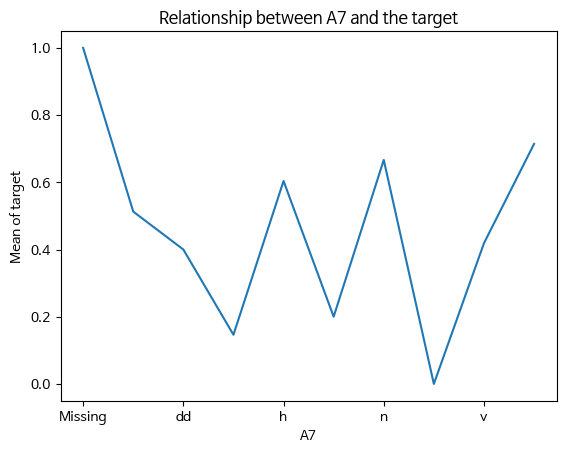

Index(['o', 'ff', 'j', 'dd', 'v', 'bb', 'h', 'n', 'z', 'Missing'], dtype='object', name='A7')


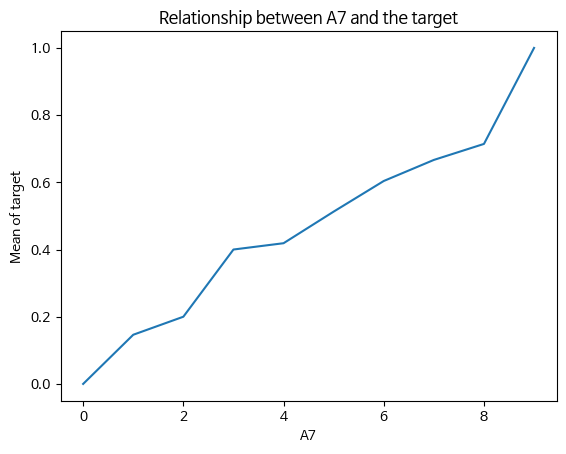

In [ ]:
#범주형 변수의 범주값을 범주의 빈도 등으로 교체
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3, random_state=0)
count_map = X_train['A7'].value_counts().to_dict()
count_map
#빈도 대신 비율인 경우
frequency_map = (X_train['A6'].value_counts() / len(X_train) ).to_dict()
#변수에 반영
X_train['A7'] = X_train['A7'].map(count_map)
X_test['A7'] = X_test['A7'].map(count_map)

#여러 특정 변수에 적용
def count_mappings(df, variable):
	return df[variable].value_counts().to_dict()
def frequency_mappings(df, variable):
	return (df[variable].value_counts() / len(df)).to_dict()
def encode(train, test, variable, mapping):
	X_train[variable] = X_train[variable].map(mapping)
	X_test[variable] = X_test[variable].map(mapping)
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

for variable in vars_categorical:
	mappings = count_mappings(X_train, variable)
	encode(X_train, X_test, variable, mappings)

#범주를 순서대로 인코딩
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data, data['A16'], test_size=0.3, random_state=0)
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

#범주별 평균 구하기
ordered_labels =X_train.groupby(['A7'])['A16'].mean().sort_values().index
print(ordered_labels)

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)

X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()


In [ ]:
#rare, infrequent 범주 그룹화
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3,random_state=0)
temp = X_train['A7'].value_counts() / len(X_train)

temp[temp>0.05]
#5%미만을 rare 범주로 변경
def find_frequent_labels(df, variable, tolerance):
	temp = df[variable].value_counts() / len(df)
	frequent = [x for x in temp.loc[temp>tolerance].index.values]
	return frequent

frequent_cat = find_frequent_labels(X_train, 'A7', 0.05)
frequent_cat
X_train['A7'] = np.where(X_train['A7'].isin(frequent_cat), X_train['A7'], 'Rare')
X_test['A7'] = np.where(X_test['A7'].isin(frequent_cat), X_test['A7'], 'Rare')

X_train['A7'].value_counts() / len(X_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


v       0.573499
h       0.209110
ff      0.084886
bb      0.080745
Rare    0.051760
Name: A7, dtype: float64

In [ ]:
pd.DataFrame(['a', 'b', 'c','a', 'c']).isin(['a', 'b'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,True
1,True
2,False
3,True
4,False


#5. Transforming Numerical Variables

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


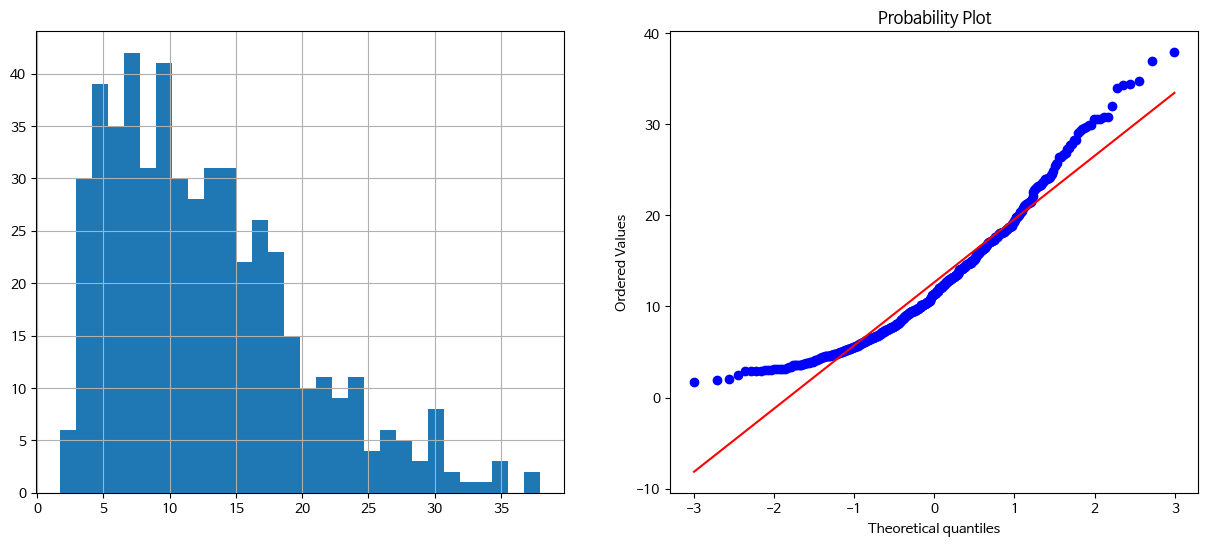

In [ ]:
#log 변환
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

def diagnostic_plots(df, variable):
	plt.figure(figsize=(15,6))
	plt.subplot(1, 2, 1)
	df[variable].hist(bins=30)
	plt.subplot(1, 2, 2)
	stats.probplot(df[variable], dist="norm", plot=plt)
	plt.show()

diagnostic_plots(boston, 'lstat')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


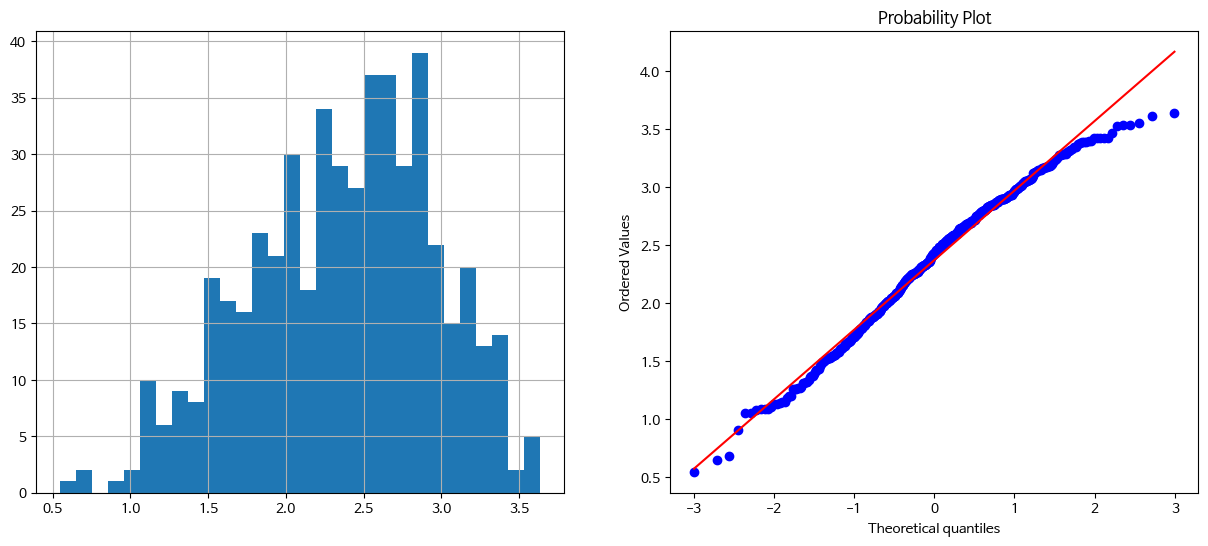

In [ ]:
data_tf = boston.copy()	#data_tf=data인 경우에는 두 데이터프레임이 같이 영향
data_tf[['lstat', 'nox', 'dis', 'rm']] = np.log(boston[['lstat', 'nox', 'dis', 'rm']])
diagnostic_plots(data_tf, 'lstat')

#sklearn으로 변환
transformer = FunctionTransformer(np.log)
data_tf = transformer.transform(boston[['lstat', 'nox', 'dis', 'rm']])
data_tf = pd.DataFrame(data_tf, columns =['lstat', 'nox', 'dis', 'rm'])


In [ ]:
np.reciprocal(boston)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in reciprocal
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in reciprocal
  result = func(self.values, **kwargs)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,158.227848,0.055556,0.432900,-9223372036854775808,1.858736,0.152091,0.015337,0.244499,1,0,0.065359,0.002520,0.200803,0.041667
1,36.616624,inf,0.141443,-9223372036854775808,2.132196,0.155739,0.012674,0.201325,0,0,0.056180,0.002520,0.109409,0.046296
2,36.643459,inf,0.141443,-9223372036854775808,2.132196,0.139179,0.016367,0.201325,0,0,0.056180,0.002546,0.248139,0.028818
3,30.892802,inf,0.458716,-9223372036854775808,2.183406,0.142898,0.021834,0.164957,0,0,0.053476,0.002534,0.340136,0.029940
4,14.482259,inf,0.458716,-9223372036854775808,2.183406,0.139919,0.018450,0.164957,0,0,0.053476,0.002520,0.187617,0.027624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,15.966789,inf,0.083822,-9223372036854775808,1.745201,0.151676,0.014472,0.403454,1,0,0.047619,0.002551,0.103413,0.044643
502,22.089684,inf,0.083822,-9223372036854775808,1.745201,0.163399,0.013038,0.437158,1,0,0.047619,0.002520,0.110132,0.048544
503,16.458196,inf,0.083822,-9223372036854775808,1.745201,0.143349,0.010989,0.461361,1,0,0.047619,0.002520,0.177305,0.041841
504,9.124920,inf,0.083822,-9223372036854775808,1.745201,0.147189,0.011198,0.418603,1,0,0.047619,0.002542,0.154321,0.045455


- 역수 변환

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


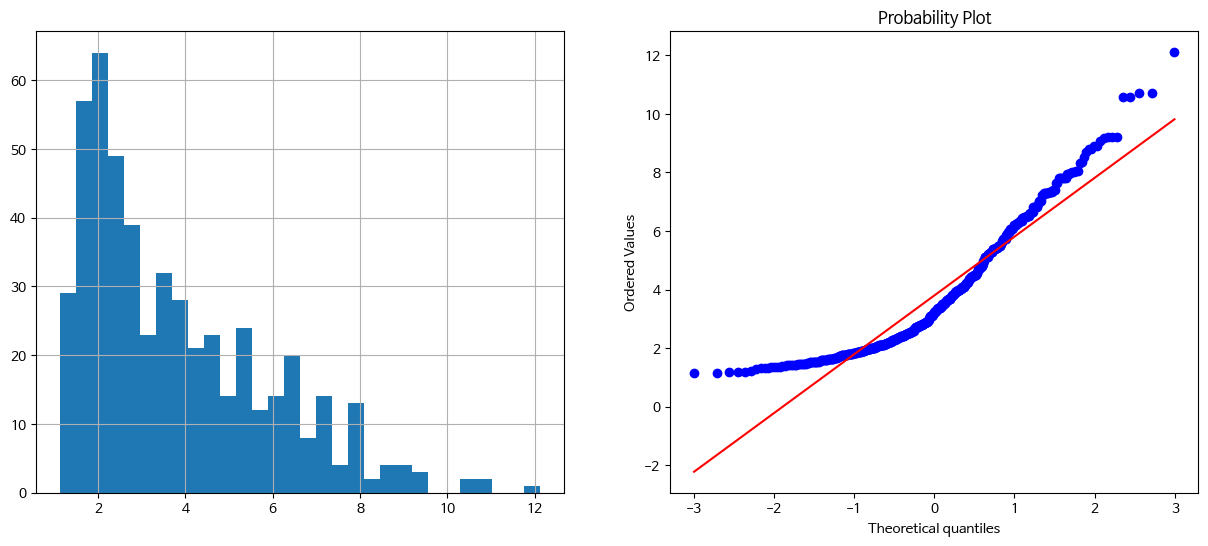

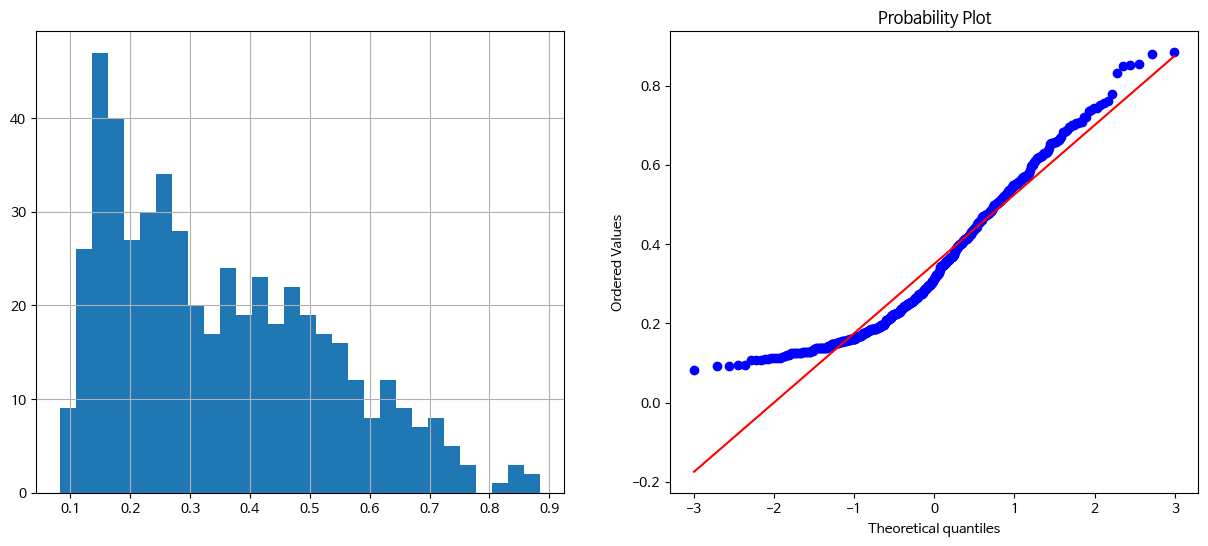

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

def diagnostic_plots(df, variable):
	plt.figure(figsize=(15,6))
	plt.subplot(1, 2, 1)
	df[variable].hist(bins=30)
	plt.subplot(1, 2, 2)
	stats.probplot(df[variable], dist="norm", plot=plt)
	plt.show()

diagnostic_plots(boston, 'dis')
data_tf = boston.copy()
data_tf[['lstat', 'nox', 'dis', 'rm']] =np.reciprocal(boston[['lstat', 'nox', 'dis', 'rm']])
diagnostic_plots(data_tf, 'dis')

#sklearn
transformer = FunctionTransformer(np.reciprocal)
data_tf = transformer.transform(boston[['lstat', 'nox', 'dis', 'rm']])
data_tf[['lstat', 'nox', 'dis', 'rm']] = transformer.transform(boston[['lstat', 'nox', 'dis', 'rm']])


#square root
data_tf = data.copy()
data_tf[['lstat', 'nox', 'dis', 'rm']] = np.sqrt(boston[['lstat', 'nox', 'dis', 'rm']])


#6. DateTime 다루기
- Deriving Features from Dates and Time Variables

In [ ]:
import pandas as pd

rng_ = pd.date_range('2019-03-05', periods=20, freq='T')
type(rng_)
rng_[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Timestamp('2019-03-05 00:00:00', freq='T')

In [ ]:
df = pd.DataFrame({'date': rng_})
df.head()
df.dtypes
df.date.dt.date
df.date.dt.time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     00:00:00
1     00:01:00
2     00:02:00
3     00:03:00
4     00:04:00
5     00:05:00
6     00:06:00
7     00:07:00
8     00:08:00
9     00:09:00
10    00:10:00
11    00:11:00
12    00:12:00
13    00:13:00
14    00:14:00
15    00:15:00
16    00:16:00
17    00:17:00
18    00:18:00
19    00:19:00
Name: date, dtype: object

In [ ]:
df['date'].dt.time
df['date_part'] = df['date'].dt.date
df['date_part'].head()

df['time_part'] = df['date'].dt.time
df['time_part'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    00:00:00
1    00:01:00
2    00:02:00
3    00:03:00
4    00:04:00
Name: time_part, dtype: object

In [ ]:
df = pd.DataFrame({'date_var':['Jan-2015', 'Apr-2013', 'Jun-2014','Jan-2015']})
pd.to_datetime(df['date_var'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
Name: date_var, dtype: datetime64[ns]

In [ ]:
df['datetime_var'] = pd.to_datetime(df['date_var'])
df

df['date'] = df['datetime_var'].dt.date
df['time'] = df['datetime_var'].dt.time
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date_var,datetime_var,date,time
0,Jan-2015,2015-01-01,2015-01-01,00:00:00
1,Apr-2013,2013-04-01,2013-04-01,00:00:00
2,Jun-2014,2014-06-01,2014-06-01,00:00:00
3,Jan-2015,2015-01-01,2015-01-01,00:00:00


In [ ]:
#달과 연도 표시
import numpy as np
import pandas as pd
rng_ = pd.date_range('2019-03-05', periods=20, freq='M')
df = pd.DataFrame({'date': rng_})
df.head()
df['year'] = df['date'].dt.year
df.head()

df['month'] = df['date'].dt.month
df.head()


df['quarter'] = df['date'].dt.quarter
df.head()

df['semester'] = np.where(df['quarter'].isin([1,2]), 1, 2)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,year,month,quarter,semester
0,2019-03-31,2019,3,1,1
1,2019-04-30,2019,4,2,1
2,2019-05-31,2019,5,2,1
3,2019-06-30,2019,6,2,1
4,2019-07-31,2019,7,3,2


In [ ]:
#day week표현
import numpy as np
import pandas as pd
rng_ = pd.date_range('2019-03-05', periods=20, freq='D')
df = pd.DataFrame({'date': rng_})
df.head()
df['day_mo'] = df['date'].dt.day
df.head()

df['day_week'] = df['date'].dt.dayofweek
df

df['day_week'].unique()



df['week'] = df['date'].dt.week
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-146-9ec060d9d68c>:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


,date,day_mo,day_week,week
0,2019-03-05,5,1,10
1,2019-03-06,6,2,10
2,2019-03-07,7,3,10
3,2019-03-08,8,4,10
4,2019-03-09,9,5,10


In [ ]:
#datetime에서 time 추출
import numpy as np
import pandas as pd

rng_ = pd.date_range('2019-03-05', periods=20, freq='1h15min10s')
df = pd.DataFrame({'date': rng_})
df.head()
df['hour'] = df['date'].dt.hour
df['min'] = df['date'].dt.minute
df['sec'] = df['date'].dt.second
df.head()
#to_datetime()를 사용하면 object에서 datetime으로 변환
df[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for
x in df['date']])
df.head()

df['is_morning'] = np.where( (df['hour'] < 12) & (df['hour'] > 6), 1, 0 )
df.head()
#datetime 변수간 측정된 기간 표현
import datetime
import numpy as np
import pandas as pd

rng_hr = pd.date_range('2019-03-05', periods=20, freq='H')
rng_month = pd.date_range('2019-03-05', periods=20, freq='M')
df = pd.DataFrame({'date1': rng_hr, 'date2': rng_month})
df.head()

df['elapsed_days'] = (df['date2'] - df['date1']).dt.days
df.head()


df['months_passed'] = ((df['date2'] - df['date1']) /
np.timedelta64(1, 'M'))
df['months_passed'] = np.round(df['months_passed'],0)
df.head()

df['diff_seconds'] = (df['date2'] -
df['date1'])/np.timedelta64(1,'s')
df['diff_minutes'] = (df['date2'] -
df['date1'])/np.timedelta64(1,'m')
df.head()

df['to_today'] = (datetime.datetime.today() - df['date1'])
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date1,date2,elapsed_days,months_passed,diff_seconds,diff_minutes,to_today
0,2019-03-05 00:00:00,2019-03-31,26,1.0,2246400.0,37440.0,1717 days 13:53:10.778597
1,2019-03-05 01:00:00,2019-04-30,55,2.0,4834800.0,80580.0,1717 days 12:53:10.778597
2,2019-03-05 02:00:00,2019-05-31,86,3.0,7509600.0,125160.0,1717 days 11:53:10.778597
3,2019-03-05 03:00:00,2019-06-30,116,4.0,10098000.0,168300.0,1717 days 10:53:10.778597
4,2019-03-05 04:00:00,2019-07-31,147,5.0,12772800.0,212880.0,1717 days 09:53:10.778597


In [ ]:
#다른 시간대의 시간 처리
import pandas as pd

df = pd.DataFrame()
df['time1'] = pd.concat([
	pd.Series(pd.date_range(start='2015-06-10 09:00', freq='H', periods=3,tz='Europe/Berlin')),
	pd.Series(pd.date_range(start='2015-09-10 09:00', freq='H', periods=3,tz='US/Central'))
	], axis=0)


df['time2'] = pd.concat([
	pd.Series(pd.date_range(start='2015-07-01 09:00', freq='H', periods=3,tz='Europe/Berlin')),
	pd.Series(pd.date_range(start='2015-08-01 09:00', freq='H', periods=3,tz='US/Central'))
], axis=0)
df

df['time1_utc'] = pd.to_datetime(df['time1'], utc=True)
df['time2_utc'] = pd.to_datetime(df['time2'], utc=True)
df

df['elapsed_days'] = (df['time2_utc'] - df['time1_utc']).dt.days
df['elapsed_days'].head()

df['time1_london'] = df['time1_utc'].dt.tz_convert('Europe/London')
df['time2_berlin'] = df['time1_utc'].dt.tz_convert('Europe/Berlin')
df[['time1_london', 'time2_berlin']]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,time1_london,time2_berlin
0,2015-06-10 08:00:00+01:00,2015-06-10 09:00:00+02:00
1,2015-06-10 09:00:00+01:00,2015-06-10 10:00:00+02:00
2,2015-06-10 10:00:00+01:00,2015-06-10 11:00:00+02:00
0,2015-09-10 15:00:00+01:00,2015-09-10 16:00:00+02:00
1,2015-09-10 16:00:00+01:00,2015-09-10 17:00:00+02:00
2,2015-09-10 17:00:00+01:00,2015-09-10 18:00:00+02:00


- Creating Features with Transactional and Time Series data
 - aggregating transaction

In [ ]:
!pip install featuretools

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#7. Up/Down Sampling
- Up sampling, Down Sampling
 - down sampling: 데이터 수를 줄이기
 - up sampling: 늘리기

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#파티셔닝 수행
from sklearn.model_selection import train_test_split
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

pima_df = pd.read_csv("diabetes.csv")
pima_df['Outcome'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    500
1    268
Name: Outcome, dtype: int64

In [ ]:

pima_df[~pima_df.applymap(np.isreal).all(1)]
pima_df = pima_df.fillna(pima_df.median())
pima_df

pima_df.describe().transpose()
pima_df.groupby(["Outcome"]).count()
sns.pairplot(pima_df , hue='Outcome' , diag_kind = 'kde')

 - Up sampling

In [61]:
from imblearn.over_sampling import SMOTE
#SMOTE for upsampling smaller cases
sm = SMOTE(sampling_strategy = 0.5 ,k_neighbors = 5, random_state=1)
#creditset2.csv를 읽으셔서 SMOTE로 0.5로 샘플링
credit = pd.read_csv("creditset2.csv", index_col=0)
X = credit.drop("default10yr", axis=1)
y = credit.default10yr
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(X_train.shape, X_train_res.shape)
print(y_train.shape, y_train_res.shape)

(1400, 2) (1806, 2)
(1400,) (1806,)


In [ ]:
# Fit the model on original data i.e. before upsampling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

# fit model on upsampled data

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))





0.7619047619047619
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       147
         1.0       0.74      0.54      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

[[131  16]
 [ 39  45]]
0.7575757575757576
[[110  37]
 [ 19  65]]
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       147
         1.0       0.64      0.77      0.70        84

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.77      0.76      0.76       231



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1)

 - Down Sampling

In [ ]:
#Down Sampling the larger class
non_diab_indices = pima_df[pima_df['Outcome'] == 0].index   # Get the record numbers of non-diab cases
no_diab = len(pima_df[pima_df['Outcome'] == 0])             # how many non-diab cases
print(no_diab)

diab_indices = pima_df[pima_df['Outcome'] == 1].index       # record number of the diabeteics cases
diab = len(pima_df[pima_df['Outcome'] == 1])                # how many diabetic cases
print(diab)

random_indices = np.random.choice( non_diab_indices, no_diab - 200 , replace=False)    #Randomly pick up 200 non-diab indices

down_sample_indices = np.concatenate([diab_indices,random_indices])  # combine the 200 non-diab indices with diab indices

pima_df_down_sample = pima_df.loc[down_sample_indices]  # Extract all those records for diab and non-diab to create new set
pima_df_down_sample.shape
pima_df_down_sample.groupby(["Outcome"]).count()  # look at the class distribution after downsample

array = pima_df_down_sample.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

print('After DownSampling, the shape of X_train: {}'.format(X_train.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test.shape))

# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))


500
268
After DownSampling, the shape of X_train: (397, 7)
After DownSampling, the shape of X_test: (171, 7) 

0.7309941520467836
[[71 27]
 [19 54]]
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.76        98
         1.0       0.67      0.74      0.70        73

    accuracy                           0.73       171
   macro avg       0.73      0.73      0.73       171
weighted avg       0.74      0.73      0.73       171



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#IMBLearn Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
y_rus
y_rus.shape

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
y_ros
y_ros.shape
X_ros.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(404, 7)

#8. 데이터프레임 Group by 및 활용

- mlxtend 설치

In [ ]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#1. 리스트 형태로 표현된 Transaction 처리
dataset = [['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
           ['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

type(dataset)
dataset


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
 ['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
 ['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary
df = pd.DataFrame(te_ary, columns=te.columns_)
df

#apriori
#입력: pandas DataFrame, min_support 기본값0.5, use_colnames 기본값 False, max_len 기본값 none

apriori(df, min_support=0.6)
apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.6,(Apple)
1,0.8,(Beans)
2,0.6,(Cookie)
3,0.8,(Eggs)
4,0.6,(Milk)
5,0.6,(Yogurt)
6,0.6,"(Eggs, Apple)"
7,0.6,"(Cookie, Beans)"
8,0.6,"(Eggs, Beans)"
9,0.6,"(Yogurt, Beans)"


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets
#필터링을 위해  length column 추가

frequent_itemsets[ (frequent_itemsets['length'] == 2)  ]

frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.6) ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
6,0.6,"(Eggs, Apple)",2
7,0.6,"(Cookie, Beans)",2
8,0.6,"(Eggs, Beans)",2
9,0.6,"(Yogurt, Beans)",2
10,0.6,"(Cookie, Eggs)",2


In [ ]:
#association_rules
#입력: dataframe
#metric: confidence(기본값), lift 등
#min_threshold: 설정된 metric으로 필터링, 0.8(기본값)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#결과 중 filtering
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2) & (rules['confidence'] > 0.75) & (rules['lift'] > 1.2) ]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
10,"(Cookie, Eggs)",(Beans),0.6,0.8,0.6,1.0,1.250000,0.12,inf,0.5,2
11,"(Cookie, Beans)",(Eggs),0.6,0.8,0.6,1.0,1.250000,0.12,inf,0.5,2
12,"(Eggs, Beans)",(Cookie),0.6,0.6,0.6,1.0,1.666667,0.24,inf,1.0,2


-파일로 부터 패턴 발견

In [ ]:
#csv/엑셀로 부터 transaction 읽은 후 association rule
#출처: UCI machine learning databases
df = pd.read_excel('OnlineRetail2.xlsx')
df.head()

#자료 정리
df['Description'] = df['Description'].str.strip()	#Description 컬럼의 문자열 전후 공백 정리
df['InvoiceNo'] = df['InvoiceNo'].astype('str')		#InvoiceNo을 문자열로 변경
df = df[~df['InvoiceNo'].str.contains('C')]		#InvoiceNo 중 정상적이지 않은 거래 건(C문자 포함 거래) 제외

#apriori에 적용할 데이터 형태로 변경
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
# 두 컬럼을 기준으로 Quantity값을 정리/ 합계구하고, 형태 변환 / index새로 생성/NaN값은0변환 / InvoiceNo으로 index 설정



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#binarize
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

type(basket)

#전체 자료에 함수 적용
basket_sets = basket.applymap(encode_units)
basket_sets.columns
basket_sets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#불필요한 컬럼 제거
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.drop('amazon', inplace=True, axis=1)
basket_sets.drop('check', inplace=True, axis=1)
basket_sets.drop('faulty', inplace=True, axis=1)
basket_sets.drop('damages', inplace=True, axis=1)
type(basket_sets)

basket_sets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#apriori
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(KNITTED UNION FLAG HOT WATER BOTTLE),(RED WOOLLY HOTTIE WHITE HEART.),0.086716,0.108856,0.058118,0.670213,6.156870,0.048679,2.702178,0.917108
1,(RED WOOLLY HOTTIE WHITE HEART.),(KNITTED UNION FLAG HOT WATER BOTTLE),0.108856,0.086716,0.058118,0.533898,6.156870,0.048679,1.959410,0.939893
2,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.096863,0.125461,0.066421,0.685714,5.465546,0.054268,2.782623,0.904665
3,(PAPER CHAIN KIT 50'S CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.125461,0.096863,0.066421,0.529412,5.465546,0.054268,1.919165,0.934248


#9. api 활용 수집


In [ ]:
!pip install -U pykrx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
tickers

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "m")
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,시가,고가,저가,종가,거래량
날짜,,,,,
2021-01-31,81000,90000,80200,88800,207737907


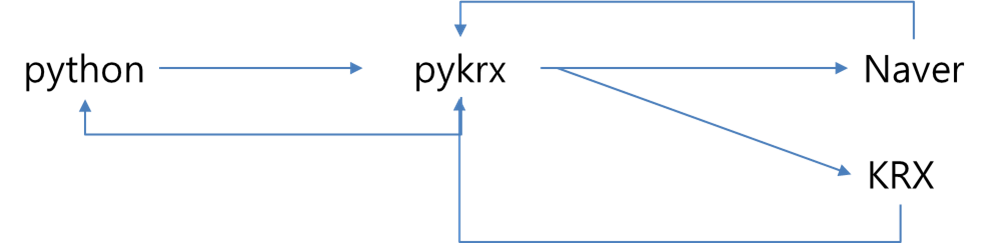

In [ ]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
len(tickers)
tickers

stock1 = stock.get_market_ticker_name("060310")
stock1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'3S'

In [ ]:
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

#월별: m, 일별: d, 연도별: y
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "d")
df

df = stock.get_market_ohlcv_by_date("20201104", "20210108", "005930", "m")
df



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,시가,고가,저가,종가,거래량
날짜,,,,,
2020-11-30,58900,69500,57800,66700,460991347
2020-12-31,67100,81300,67100,81000,529998852
2021-01-31,81000,90000,80200,88800,207737907


In [ ]:
df = stock.get_market_price_change_by_ticker("20210104", "20210115")
print(df.head(5))

df = stock.get_market_ohlcv_by_date("20210104", "20210115", "000020")
df

#KOSPI, KOSDAQ, KONEX 지원
df = stock.get_market_trading_volume_by_date("20210104", "20210115", "KOSPI")
print(df.head(5))

df = stock.get_market_trading_volume_by_date("20200101", "20210115", 'KOSPI', freq='m')
df

df = stock.get_market_trading_value_by_date("20210104", "20210115", "KOSPI")
df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            종목명      시가      종가   변동폭   등락률       거래량          거래대금
티커                                                                 
095570   AJ네트웍스    4615    4510  -105 -2.28   3982449   18726203680
006840    AK홀딩스   25150   26300  1150  4.57   1590631   41092351750
027410      BGF    4895    4830   -65 -1.33   4729036   23091599895
282330   BGF리테일  135500  145000  9500  7.01    809850  114155484750
138930  BNK금융지주    5680    5880   200  3.52  36350605  209410643490
                기관합계      기타법인        개인     외국인합계  전체
날짜                                                    
2021-01-04 -18241927  -2321155  13307925   7255157   0
2021-01-05   -282797 -20356879  21335001   -695325   0
2021-01-06 -28606702   1763197  19464237   7379268   0
2021-01-07  16803440  -4926713 -23957887  12081160   0
2021-01-08 -24886527   1334709   6228334  17323484   0


,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2021-01-04,-1189876714363,69165156608,1031014166618,89697391137,0
2021-01-05,-536265643081,16098509714,728387733108,-208220599741,0
2021-01-06,-1369155503764,37370130195,1729261196142,-397475822573,0
2021-01-07,1033917002121,36342229807,-1183634539101,113375307173,0
2021-01-08,-1147931424901,63596153201,-559141825960,1643477097660,0
2021-01-11,-3743203896260,-31327947241,4492145003867,-717613160366,0
2021-01-12,-1723898682006,30388878033,2312445113552,-618935309579,0
2021-01-13,-372450411172,9868157834,169086090692,193496162646,0
2021-01-14,-1428981445508,38743362517,712730906649,677507176342,0


In [ ]:
df = stock.get_market_fundamental_by_ticker("20210115")
print(df.head(2))

df = stock.get_market_fundamental_by_date("20210104", "20210115", '005930')
print(df.head(2))

df = stock.get_market_fundamental_by_date("20201004", "20210115", "005930", "m")
print(df.head(2))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          BPS    PER   PBR   EPS   DIV  DPS
티커                                         
095570   6802   4.59  0.66   982  6.65  300
006840  62448  12.13  0.42  2168  2.85  750
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2021-01-04  37528  26.22  2.21  3166  1.71  1416
2021-01-05  37528  26.50  2.24  3166  1.69  1416
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2020-10-31  37528  18.54  1.56  3166  2.41  1416
2020-11-30  37528  18.13  1.53  3166  2.47  1416


In [ ]:
df = stock.get_market_fundamental_by_date("20230703", "20230707", '005930')
print(df.head(2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              BPS   PER   PBR   EPS   DIV   DPS
날짜                                             
2023-07-03  57822  9.06  1.26  8057  1.98  1444
2023-07-04  57822  9.06  1.26  8057  1.98  1444
